In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

stock_df = pd.read_csv('indexData.csv')
stock_df

2023-12-20 17:36:37.333969: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-20 17:36:37.334005: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-20 17:36:37.336071: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-20 17:36:37.345607: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-20 17:36:38.388232: W tensorflow/compiler/tf2

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0
...,...,...,...,...,...,...,...,...
112452,N100,2021-05-27,1241.119995,1251.910034,1241.119995,1247.069946,1247.069946,379696400.0
112453,N100,2021-05-28,1249.469971,1259.209961,1249.030029,1256.599976,1256.599976,160773400.0
112454,N100,2021-05-31,1256.079956,1258.880005,1248.140015,1248.930054,1248.930054,91173700.0
112455,N100,2021-06-01,1254.609985,1265.660034,1254.609985,1258.579956,1258.579956,155179900.0


### Data preprocessing

In [2]:
stock_NYA_df = stock_df[stock_df['Index'] == 'NYA']
stock_NYA_df

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.000000e+00
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.000000e+00
...,...,...,...,...,...,...,...,...
13943,NYA,2021-05-24,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450,2.947400e+09
13944,NYA,2021-05-25,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450,3.420870e+09
13945,NYA,2021-05-26,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940,3.674490e+09
13946,NYA,2021-05-27,16451.960940,16546.359380,16451.960940,16531.949220,16531.949220,5.201110e+09


In [3]:
stock_NYA_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13948 entries, 0 to 13947
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      13948 non-null  object 
 1   Date       13948 non-null  object 
 2   Open       13947 non-null  float64
 3   High       13947 non-null  float64
 4   Low        13947 non-null  float64
 5   Close      13947 non-null  float64
 6   Adj Close  13947 non-null  float64
 7   Volume     13947 non-null  float64
dtypes: float64(6), object(2)
memory usage: 980.7+ KB


In [4]:
stock_NYA_df = stock_NYA_df.dropna()
stock_NYA_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13947 entries, 0 to 13947
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Index      13947 non-null  object 
 1   Date       13947 non-null  object 
 2   Open       13947 non-null  float64
 3   High       13947 non-null  float64
 4   Low        13947 non-null  float64
 5   Close      13947 non-null  float64
 6   Adj Close  13947 non-null  float64
 7   Volume     13947 non-null  float64
dtypes: float64(6), object(2)
memory usage: 980.6+ KB


In [5]:
stock_NYA_df['Date'] = pd.to_datetime(stock_NYA_df['Date'])
stock_NYA_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13947 entries, 0 to 13947
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Index      13947 non-null  object        
 1   Date       13947 non-null  datetime64[ns]
 2   Open       13947 non-null  float64       
 3   High       13947 non-null  float64       
 4   Low        13947 non-null  float64       
 5   Close      13947 non-null  float64       
 6   Adj Close  13947 non-null  float64       
 7   Volume     13947 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 980.6+ KB


/tmp/ipykernel_63039/3815177697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_NYA_df['Date'] = pd.to_datetime(stock_NYA_df['Date'])


In [6]:
stock_NYA_df['day_difference'] = stock_NYA_df['Date'].diff().dt.days
stock_NYA_df

/tmp/ipykernel_63039/761583660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_NYA_df['day_difference'] = stock_NYA_df['Date'].diff().dt.days


,Index,Date,Open,High,Low,Close,Adj Close,Volume,day_difference
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.000000e+00,NaN
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.000000e+00,3.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.000000e+00,1.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.000000e+00,1.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.000000e+00,1.0
...,...,...,...,...,...,...,...,...,...
13943,NYA,2021-05-24,16375.000000,16508.519530,16375.000000,16464.689450,16464.689450,2.947400e+09,3.0
13944,NYA,2021-05-25,16464.689450,16525.810550,16375.150390,16390.189450,16390.189450,3.420870e+09,1.0
13945,NYA,2021-05-26,16390.189450,16466.339840,16388.320310,16451.960940,16451.960940,3.674490e+09,1.0
13946,NYA,2021-05-27,16451.960940,16546.359380,16451.960940,16531.949220,16531.949220,5.201110e+09,1.0


In [7]:
stock_NYA_df['day_difference'].value_counts()

day_difference
1.0    10889
3.0     2556
4.0      332
2.0      165
5.0        3
7.0        1
Name: count, dtype: int64

In [8]:
data = stock_NYA_df['Adj Close'].to_numpy()
data

array([  528.690002,   527.210022,   527.840027, ..., 16451.96094 ,
       16531.94922 , 16555.66016 ])

In [9]:
data.shape

(13947,)

In [10]:
data = np.reshape(data, (len(data), 1))
data.shape

(13947, 1)

In [11]:
data

array([[  528.690002],
       [  527.210022],
       [  527.840027],
       ...,
       [16451.96094 ],
       [16531.94922 ],
       [16555.66016 ]])

In [12]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[0.01113857],
       [0.01104745],
       [0.01108624],
       ...,
       [0.991475  ],
       [0.99639958],
       [0.99785937]])

In [13]:
window_size = 60

X, y = [], []

for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i-window_size:i, 0])
    y.append(scaled_data[i, 0])

X[:2]

[array([0.01113857, 0.01104745, 0.01108624, 0.01128818, 0.01134666,
        0.01137929, 0.01145748, 0.01148334, 0.01142486, 0.01149012,
        0.01155476, 0.01167851, 0.01176962, 0.01169143, 0.0115683 ,
        0.01158739, 0.01169143, 0.01171791, 0.01168528, 0.01167235,
        0.0115683 , 0.01142486, 0.01116443, 0.01130788, 0.01134666,
        0.01155476, 0.01166558, 0.01163972, 0.01182811, 0.01173699,
        0.01173084, 0.01169821, 0.01155476, 0.0115486 , 0.01137252,
        0.01130788, 0.0111121 , 0.01096926, 0.0107544 , 0.01084551,
        0.0108843 , 0.01047427, 0.01016213, 0.01029203, 0.01019414,
        0.00976503, 0.00979704, 0.01005747, 0.01006424, 0.01003838,
        0.00967391, 0.0094652 , 0.00963451, 0.0097324 , 0.009882  ,
        0.01012273, 0.01021384, 0.0101098 , 0.01015536, 0.01023355]),
 array([0.01104745, 0.01108624, 0.01128818, 0.01134666, 0.01137929,
        0.01145748, 0.01148334, 0.01142486, 0.01149012, 0.01155476,
        0.01167851, 0.01176962, 0.01169143, 0.

In [14]:
X, y = np.array(X), np.array(y)
X[:2]

array([[0.01113857, 0.01104745, 0.01108624, 0.01128818, 0.01134666,
        0.01137929, 0.01145748, 0.01148334, 0.01142486, 0.01149012,
        0.01155476, 0.01167851, 0.01176962, 0.01169143, 0.0115683 ,
        0.01158739, 0.01169143, 0.01171791, 0.01168528, 0.01167235,
        0.0115683 , 0.01142486, 0.01116443, 0.01130788, 0.01134666,
        0.01155476, 0.01166558, 0.01163972, 0.01182811, 0.01173699,
        0.01173084, 0.01169821, 0.01155476, 0.0115486 , 0.01137252,
        0.01130788, 0.0111121 , 0.01096926, 0.0107544 , 0.01084551,
        0.0108843 , 0.01047427, 0.01016213, 0.01029203, 0.01019414,
        0.00976503, 0.00979704, 0.01005747, 0.01006424, 0.01003838,
        0.00967391, 0.0094652 , 0.00963451, 0.0097324 , 0.009882  ,
        0.01012273, 0.01021384, 0.0101098 , 0.01015536, 0.01023355],
       [0.01104745, 0.01108624, 0.01128818, 0.01134666, 0.01137929,
        0.01145748, 0.01148334, 0.01142486, 0.01149012, 0.01155476,
        0.01167851, 0.01176962, 0.01169143, 0.0

In [15]:
X.shape

(13887, 60)

In [16]:
test_split = 0.2
split_index = int(len(y) * (1-test_split))
X_train = X[:split_index]
Y_train = y[:split_index]
X_test = X[(split_index + window_size - 1):]
Y_test = y[(split_index + window_size - 1):]

indices = np.arange(len(Y_train))
np.random.shuffle(indices)
X_train = X_train[indices]
Y_train = Y_train[indices]

In [17]:
X_train[:2]

array([[0.01333218, 0.01332541, 0.01320843, 0.01276577, 0.01247271,
        0.01258353, 0.01250534, 0.01245978, 0.01254475, 0.01263586,
        0.0121735 , 0.0115486 , 0.01127525, 0.01100805, 0.01101482,
        0.01131403, 0.01130111, 0.01084551, 0.0105069 , 0.01068914,
        0.0106368 , 0.01054569, 0.01051367, 0.01106038, 0.01129433,
        0.01142486, 0.01107947, 0.01093663, 0.01036345, 0.00981059,
        0.00953046, 0.0097324 , 0.00969299, 0.00979088, 0.01043548,
        0.01040285, 0.01013566, 0.01005131, 0.01014243, 0.01018122,
        0.01054569, 0.01002545, 0.00973855, 0.00974533, 0.00966036,
        0.00943257, 0.00889879, 0.00876889, 0.00877504, 0.00847583,
        0.00849553, 0.00891849, 0.00885323, 0.00836501, 0.00853432,
        0.0084826 , 0.00906194, 0.00945227, 0.00953046, 0.01008394],
       [0.33254282, 0.3333826 , 0.32983454, 0.31633304, 0.31197169,
        0.29145227, 0.30143217, 0.30058563, 0.29749992, 0.29516963,
        0.30967342, 0.30445261, 0.29612021, 0.3

### Creating a model

In [18]:
model_lstm = tf.keras.models.Sequential()
model_lstm.add(tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1), recurrent_dropout=0.2))
model_lstm.add(tf.keras.layers.LSTM(units=50))
model_lstm.add(tf.keras.layers.Dense(units=1))

# optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, clipvalue=1.0)
model_lstm.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mae'])
model_lstm.summary()

2023-12-20 17:36:39.913557: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: rol3ert99-PC
2023-12-20 17:36:39.913576: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: rol3ert99-PC
2023-12-20 17:36:39.913644: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2023-12-20 17:36:39.913673: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 530.41.3


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Traning a model

In [19]:
model_lstm.fit(X_train, Y_train, epochs=30, batch_size=32, validation_split=0.2)

Epoch 1/30
278/278 [==============================] - 16s 46ms/step - loss: 7.7970e-04 - mae: 0.0094 - val_loss: 4.5844e-05 - val_mae: 0.0034
Epoch 2/30
278/278 [==============================] - 12s 43ms/step - loss: 4.3770e-05 - mae: 0.0038 - val_loss: 4.3210e-05 - val_mae: 0.0032
Epoch 3/30
278/278 [==============================] - 12s 43ms/step - loss: 4.3048e-05 - mae: 0.0038 - val_loss: 4.1098e-05 - val_mae: 0.0031
Epoch 4/30
278/278 [==============================] - 12s 42ms/step - loss: 3.9538e-05 - mae: 0.0037 - val_loss: 3.6359e-05 - val_mae: 0.0033
Epoch 5/30
278/278 [==============================] - 12s 42ms/step - loss: 4.2871e-05 - mae: 0.0039 - val_loss: 5.8950e-05 - val_mae: 0.0046
Epoch 6/30
278/278 [==============================] - 12s 43ms/step - loss: 3.8752e-05 - mae: 0.0038 - val_loss: 3.3088e-05 - val_mae: 0.0033
Epoch 7/30
278/278 [==============================] - 12s 42ms/step - loss: 3.4589e-05 - mae: 0.0036 - val_loss: 3.3006e-05 - val_mae: 0.0032
Epoch 

In [20]:
model_lstm.evaluate(X_test, Y_test)

85/85 [==============================] - 1s 14ms/step - loss: 9.5721e-05 - mae: 0.0074


[9.572075941832736e-05, 0.0073929703794419765]

1/1 [==============================] - 0s 22ms/step


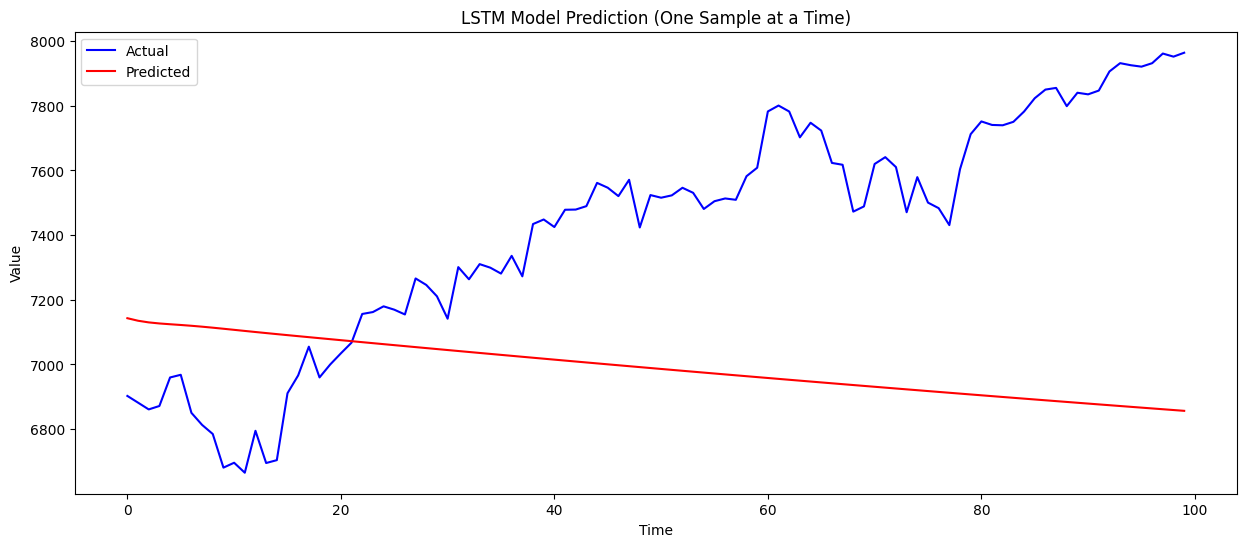

In [53]:
import matplotlib.pyplot as plt
import numpy as np

predictions = []
num_predictions = 100

current_window = X_test[0].reshape(1, -1, 1)

for i in range(num_predictions):
    predict_val = model_lstm.predict(current_window)
    predictions.append(predict_val[0, 0])
    current_window = np.concatenate((current_window[:, 1:, :], predict_val.reshape(1, 1, 1)), axis=1)

y_test_actual = scaler.inverse_transform(np.array(Y_test).reshape(-1, 1))
predictions_actual = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

plt.figure(figsize=(15, 6))
plt.plot(y_test_actual[:100], label='Actual', color='blue')
plt.plot(predictions_actual, label='Predicted', color='red')
plt.title('LSTM Model Prediction (One Sample at a Time)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()
